In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
luxun_data = pd.read_csv('data/luxun.csv')
jinyong_data = pd.read_csv('data/jinyong.csv')
battle_data = pd.read_csv('data/battle_through_the_heavens.csv')
all_data = pd.read_csv('data/luxun.csv')
all_data = all_data.append(jinyong_data, ignore_index=True)
all_data = all_data.append(battle_data, ignore_index=True)


In [3]:
# print(luxun_data.describe())
# print(battle_data.describe())
# print(jinyong_data.describe())
# print(all_data.descrappend
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190884 entries, 0 to 190883
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        190884 non-null  object
 1   novel_name  190884 non-null  object
 2   novel_cls   190884 non-null  object
dtypes: object(3)
memory usage: 4.4+ MB
None


In [4]:
# print(luxun_data.info())
# print(battle_data.info())
# print(jinyong_data.info())
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190884 entries, 0 to 190883
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        190884 non-null  object
 1   novel_name  190884 non-null  object
 2   novel_cls   190884 non-null  object
dtypes: object(3)
memory usage: 4.4+ MB
None


## Count length

In [7]:
luxun_avg_len = sum([len(i) for i in luxun_data['text']])/luxun_data['text'].count()
jinyong_avg_len = sum([len(i) for i in jinyong_data['text']])/jinyong_data['text'].count()
battle_avg_len = sum([len(i) for i in battle_data['text']])/battle_data['text'].count()
p_len = []
for i in range(luxun_data['text'].count()):
    p_len.append(luxun_avg_len)
for i in range(jinyong_data['text'].count()):
    p_len.append(luxun_avg_len)
for i in range(battle_data['text'].count()):
    p_len.append(luxun_avg_len)
all_data['p_len'] = p_len

IndexError: invalid index to scalar variable.

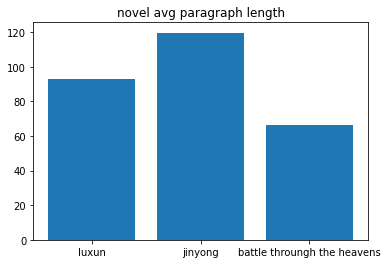

In [6]:
y = [luxun_avg_len, jinyong_avg_len, battle_avg_len]
x = ['luxun', 'jinyong', 'battle throungh the heavens']

plt.title("novel avg paragraph length")
plt.bar(x, y)
plt.show()

In [7]:
import jieba
import json
import jieba.analyse
from tqdm import tqdm
import sys
import pickle
import chardet
sys.setrecursionlimit(1000000)
#set stop words
jieba.analyse.set_stop_words('data/stopwords.txt')
f = open('data/stopwords.txt', 'r', encoding = 'UTF-8')
stopwords = []
for i in f.read():
    stopwords.append(i)
f.close()
# jieba.enable_paddle()


In [8]:
#get word
luxun_word = []
jinyong_word = []
battle_word = []
max_chap = 10000
count = 0
stopword_count = 0
for i in tqdm(luxun_data['text']):
    count += 1
    if count > max_chap:
        break
    #split
    l =  jieba.lcut(i)
    #clean stopwords
    nl = []
    for j in l:
        if j in stopwords:
            stopword_count += 1
        else:
            nl.append(j) 
    # one sentence join
    l = " ".join(nl)
    luxun_word.append(l)

print("luxun stopwords", stopword_count)
count = 0
stopword_count = 0
for i in tqdm(jinyong_data['text']):
    count += 1
    if count > max_chap:
        break
    #split
    l =  jieba.lcut(i)
    nl = []
    #clean stopword
    for j in l:
        if j in stopwords:
            stopword_count += 1
        else:
            nl.append(j)
    #join the sentence
    l = " ".join(nl)
    jinyong_word.append(l)
print("jinyong stopwords", stopword_count)
count = 0
stopword_count = 0
for i in tqdm(battle_data['text']):
    count += 1
    if count > max_chap:
        break
    #split
    l =  jieba.lcut(i)
    #clean stopword
    nl = []
    for j in l:
        if j in stopwords:
            stopword_count += 1
        else:
            nl.append(j)

    # join the sentences
    l = " ".join(nl) 
    battle_word.append(l)
print("battle", stopword_count)
stopword_count = 0
# file_word = open('data/allword.txt', 'wb')
# pickle.dump(word, file_word)
print(len(luxun_word))
print(len(jinyong_word))
print(len(battle_word))

  0%|          | 0/32947 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.659 seconds.
Prefix dict has been built successfully.
 12%|█▏        | 10000/84046 [00:10<01:20, 919.73it/s]battle 216800
10000
10000
10000



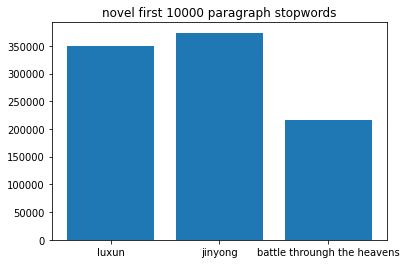

In [14]:
y = [348995, 373613, 216800]
x = ['luxun', 'jinyong', 'battle throungh the heavens']

plt.title("novel first 10000 paragraph stopwords")
plt.bar(x, y)
plt.show()

In [10]:
#tfidf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


tfv = TfidfVectorizer(min_df=10,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern='\\b\\w+\\b', use_idf=1,smooth_idf=1,sublinear_tf=1)

tfv.fit([*battle_word, *jinyong_word, *luxun_word])
# print(tfv.get_feature_names())
all_bag = tfv.transform(all_data.text)

In [11]:
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
#label encode
lbl_enc = preprocessing.LabelEncoder()
all_y = lbl_enc.fit_transform(all_data.novel_name.values)

In [12]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1.0)
clf.fit(all_bag, all_y)

LogisticRegression()

In [23]:
predictions = clf.predict_proba(all_bag[0:300])
print ("logloss: %0.3f " % multiclass_logloss(all_y[0:300], predictions))
count = 0
for i in predictions:
    if np.argmax(i) == 0:
        count += 1
print(count / 300)

logloss: 1.378 
0.6866666666666666


In [20]:
print(all_bag.shape)

(190884, 13071)
